# Introduction to Graphical Models homework 2 : MAP estimation on NMF

<br>

<center>
<b>
El Hanafi Imad, Jarboui Firas and Obst David
</b>
</center>

<br>

The goal of this homework is to implement a variant of the nonnegative matrix factorization (NMF) algorithm we saw in class. We remind that the goal is to approximate a nonnegative matrix $V$ by a matrix $\hat{V} = W\times H$ where both matrices are again nonnegative and as sparse as possible. While in class the latter were estimated by using maximum likelihood, the aim of this work is to perform a maximum a-posteriori (MAP) estimation instead.

# I - Model

Consider the following probabilistic non-negative matrix factorization where we set a gamma prior on the coefficients $w_{ik}$ and $h_{kj}$ of the estimated matrices $W$ and $V$. The graphical model of the situation is thus the following:


<p align="center">
  <img src="DAG.png" width="150">
</p>

\begin{equation}
\begin{cases}
w_{ik} \sim \mathcal{G}(w_{ik};\alpha_w,\beta_w)\\
\\
h_{kj} \sim \mathcal{G}(h_{kj};\alpha_h,\beta_h)
\end{cases}
\end{equation}

where $\alpha_w, \alpha_h, \beta_w$ and $\beta_h$ are all $>0$.

And $ v_{fn}|w_{f,:},h_{:,n} \sim \mathcal{PO}(v_{fn} ; \sum_{k =1}^{K}{w_{fk}h_{kn}}) $. For $f = 1,..., F$ , $n = 1,...,N$ , $k = 1,...,K$. we set $\hat v_{fn} =  \sum_{k =1}^{K}{w_{fk}h_{kn}}$

We recall the PDF of the gamma distribution $\mathcal{G}$ and poisson $\mathcal{PO}$:

$$
\mathcal{G}(y;a,b) = \exp\big( (a-1)\log y - by - \log \Gamma(a)+a\log b \big)
$$

$$
\mathcal{PO}(x;\lambda) = \exp\big(x\log\lambda -\lambda - log\Gamma(x+1)\big)
$$

# II - Expectation-Maximization algorithm for finding the maximum a-posteriori estimate (MAP)

In this section we will derive the EM algorithm to find the maximum a-posteriori defined as follows:

$$
(W^*,V^*) = \arg\max_{W,H} \log p(W,H/V)
$$
Where $ V = [v_{fn}]_{f,n}$, $ W = [w_{fk}]_{f,k}$ and $ H = [h_{kn}]_{k,n}$

Using the Bayes formula $ p(W,H/V) = \frac{p(V/W,H)p(W,H)}{p(V)}$ and since we are maximizing over (W,H), we can omit $p(V)$. The problem becomes 

$$
(W^*,V^*) = \arg\max_{W,H} log p(V,W,H)
$$

Augmented model :
-----------------


The first step in using the EM algorithm in this problem, is introducing an auxiliary latent random variables. We define $S_{fnk}$ as follows 

$$
S_{fnk} / w_{fk},h_{kn} \sim \mathcal{PO}(S_{fnk}; w_{fk}h_{kn})
$$
 
Clearly we have $ v_{fn} = \sum_{k=1}^{K}{S_{fnk}}$ and $ v_{fn}/S_{fnk} \sim \delta(v_{fn} - \sum_{k=1}^{K}{S_{fnk}})$

----------

- **EM algorithm:** 

The EM algorithm is defined by two steps: 

      - E-step: 
      
$$\mathcal{L}_t(W,H) = \mathbb{E}(\log p(V,S,W,H))_{P(S/V,W_t,H_t)}$$

      - M-step: 
$$  (W_{t+1},H_{t+1}) = \arg\max_{W,H}\mathcal{L}_t(W,H) $$

 ----------
 
 - **E-step **
 
The first step is to develop $\log p(V,S,W,H)$ using the hypothesis of our model.

\begin{equation}
\begin{aligned}
\log p(V,S,W,H) &= \log p(V/S,W,H) + \log p(S,W,H) \\ 
    &= \log p(V/S,W,H) + \log p(S/W,H) + \log p(W,H) \\
\end{aligned}
\end{equation}

Knowing the distribution of each term, we get 

$$
\log p(V,S,W,H) = \sum_{fn}{log(\delta\big (v_{fn} - \sum_{k}{S_{fnk}}\big )} + \sum_{fnk}{S_{fnk} \log(w_{fk}h_{kn}) -w_{fk}h_{kn} - \log \Gamma(S_{fnk} + 1)} + \sum_{fk} {\log \mathcal{G}(w_{fk};\alpha_w,\beta_w)} + \sum_{kn} {\log \mathcal{G}(h_{kn};\alpha_h,\beta_h)} 
$$

Where $ \mathcal{G}(y;a,b) = \exp((a-1)\log y - by - \log\Gamma(a)+a\log b$.


Let's develop now $p(S/V,W_t,H_t)$. Using the Bayes formula we get

\begin{equation}
\begin{aligned}
p(S/V,W_t,H_t) = \frac{p(V/S,W_t,H_t)p(S/W_t,H_t)}{p(V/W_t,H_t)} 
\end{aligned}
\end{equation}

We write then

$$
\log p(S/V,W_t,H_t)  = \log p(V/S) + \log p(S/W_t,H_t) - \log p(V/W_t,H_t)
$$

We know the distribution of every term in the previous formula, a simple calculation lead us to

$$
\log(P(S/V,W_t,H_t)) = \log \prod_{fn}{\mathcal{M}(S_{fn,:};v_{fn},(\pi_1,...,\pi_k)_t}
$$
Where $\mathcal{M}$ is the multinomial distribution and $\pi_k^{(t)} = \frac{w_{fk}^{(t)}h_{kn}^{(t)}}{\hat v_{fn}} $

**Conclusion E-Step:**

We are now able to calculate the expectation of $\log p(V,S,W,H)$ with respect to $\log p(S/V,W_t,H_t)$ and since ine the M-step we will take the derivatives on $w_{fk}$ and $h_{kn}$, we will omit all terms that do not contain $w_{fk}$ and $h_{kn}$.


We get the formula of $\mathcal{L}_t(W,H)$ (to an additif term, we use only terms that contain $w_{fk}$ and $h_{kn}$)

$$
\mathcal{L}_t(W,H) =^+ \sum_{fnk}{\big(\mathbb{E}[S_{fnk}]\log(w_{fk}h_{hk}) - w_{fk}h_{hk}\big)} + \sum_{fk}{\big((\alpha_{w}-1)\log w_{fk} - \beta_w w_{fk} \big)} + \sum_{kn}{\big((\alpha_{h}-1)\log h_{kn} - \beta_h h_{kn} \big)}$$


- **M-setp:** 

Writing the optimality conditions on the partial derivatives of the lower bound $\mathcal{L}_t$ with respect to $w_{fk}$ and $h_{kn}$ yields:

$$\begin{cases}
\dfrac{\partial \mathcal{L}_t}{\partial w_{fk}}(W,H) = 0 \\
\\
\dfrac{\partial \mathcal{L}_t}{\partial h_{kn}}(W,H) = 0
\end{cases}$$

Which means

$$\begin{cases}
\displaystyle\sum_n \Big( \mathbb{E}[s_{fnk}] \dfrac{1}{w_{fk}} - h_{kn} \Big) + (\alpha_w - 1) \dfrac{1}{w_{fk}} - \beta_w =  0 \\
\\
\displaystyle\sum_f \Big( \mathbb{E}[s_{fnk}] \dfrac{1}{h_{kn}} - w_{fk} \Big) + (\alpha_h - 1) \dfrac{1}{h_{kn}} - \beta_h =  0
\end{cases}$$

Therefore 

$$\begin{cases}
w_{fk}^{(t+1)}  =  \dfrac{\displaystyle \sum_n \mathbb{E}[s_{fnk}] + \alpha_w - 1}{\displaystyle \sum_n h_{kn}^{(t)} + \beta_w}  \\
\\
h_{kn}^{(t+1)}  =  \dfrac{\displaystyle \sum_f \mathbb{E}[s_{fnk}] + \alpha_h - 1}{\displaystyle \sum_f w_{fk}^{(t)} + \beta_h} 
\end{cases}$$

Finally, since $S | V,W,H$ follows a product of multinomial distributions one obtains that 

$$
\mathbb{E}[S_{fnk}] = v_{fn} \dfrac{w_{fk}^{(t)} h_{kn}^{(t)}}{\hat{v}_{fn}^{(t)}}
$$  

In the algorithmic scheme first the matrix $W$ will be updated, then a $\tilde{V}$ will be calculated using the current $W$ and the $H$ obtained at the previous step to update in result $H$ and obtain the $\hat{V}$ at the current iteration. This yields the MAP update scheme for the coefficients: 

\begin{equation}
 \begin{cases}
 w_{f,k}^{(t+1)} = \dfrac{ w_{f,k}^{(t)} \, \displaystyle\sum_n h_{k,n}^{(t)}\dfrac{v_{f,n} }{\hat{v}_{f,n}^{(t)}}+ (\alpha_w - 1)}{\displaystyle \sum_n h_{k,n}^{(t)} + \beta_w} \\
 \\
 \tilde{v}_{fn}^{(t)} = \displaystyle\sum_k w_{fk}^{(t+1)} h_{kn}^{(t)} \\
 \\
  h_{k,n}^{(t+1)} = \dfrac{h_{k,n}^{(t)}\displaystyle\sum_f w_{f,k}^{(t+1)} \dfrac{v_{f,n}}{\tilde{v}_{f,n}^{(t)}} + (\alpha_{h}-1)}{\displaystyle\sum_f w_{f,k}^{(t+1)}+\beta_h} \\
  \\
  \hat{v}_{fn}^{(t+1)} = \displaystyle\sum_k w_{fk}^{(t+1)} h_{kn}^{(t+1)}
 \end{cases}
\end{equation}

Which can also be rewritten under matrix form:

\begin{equation}
\begin{cases}
W^{(t+1)} =  \dfrac{W^{(t)} \odot \big( V \oslash \hat{V}^{(t)} H_{(t)}^\top \big) + (\alpha_w - 1) \mathcal{O}}{\mathcal{O} H_{(t)}^\top + \beta_w \mathcal{O}} \\
\\
\tilde{V}^{(t)} = W^{(t+1)} H^{(t)} \\
\\
H^{(t+1)} = \dfrac{H^{(t)} \odot \big(W_{(t+1)}^{T} V \oslash\tilde{V}^{(t)} \big) + (\alpha_h - 1)\mathcal{O}}{\beta_h\mathcal{O} +  W^\top_{(t+1)}\mathcal{O}} \\
\\
\hat{V}^{(t+1)} = W^{(t+1)} H^{(t+1)} 
\end{cases}
\end{equation}

where $\mathcal{O}$ is a matrix with $1$'s everywhere.

# III - Implementation of the algorithm

In this section we implement the code which has been developed. Tests to verify our code will be performed in the first hand. Then analysis on the parameters of the Gamma priors on $W$ and $H$ will be done.

## Implementation and verifications


In [45]:
from IPython.display import HTML,display,Markdown

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

# Read Data from attfaces.mat

f = scipy.io.loadmat('attfaces.mat')
x = f["V"]
# This will load the matrix V
V = np.array(x)

### Parameters for pictures
# Dimension of each picture

height = 112
width = 92
V.shape

# Each column represents a picture of dimension 112*92 = 10304
# and we have 400 pictures

IOError: [Errno 2] No such file or directory: 'attfaces.mat'

In [2]:
import plotly


In [3]:
# A function to visualize pictures from a matrix

def visualize(V,nb_h,numVisualize):
    # V is the matrix representing pictures
    # numVisualize : numbers of pictures in the matrix V (for this case it's equal to 400)
    # nb_h : number of pictures by columns
    # nb_l : number of pictures by rows
    # nb_h*nb_l = numVisualize 
    
    nb_l = int(numVisualize/nb_h)
    sqrtNumVis = int(np.sqrt(numVisualize))
    
    V_visual = np.zeros((height*nb_h,width*nb_l))
    ix = 0
    ix1 = 0
    for i in range(nb_h):
        ix2 = 0
        for j in range(nb_l):
            curV = V[:,ix]
            curV = np.reshape(curV,[height, width], order='F')
            V_visual[ix1:(ix1+height), ix2:(ix2+width)] = curV
            ix2 = ix2 + width
            ix = ix+1
        ix1 = ix1 + height
    # plot
    plt.figure(figsize=(20,15))
    plt.imshow(V_visual)
    plt.gray()
    plt.show()

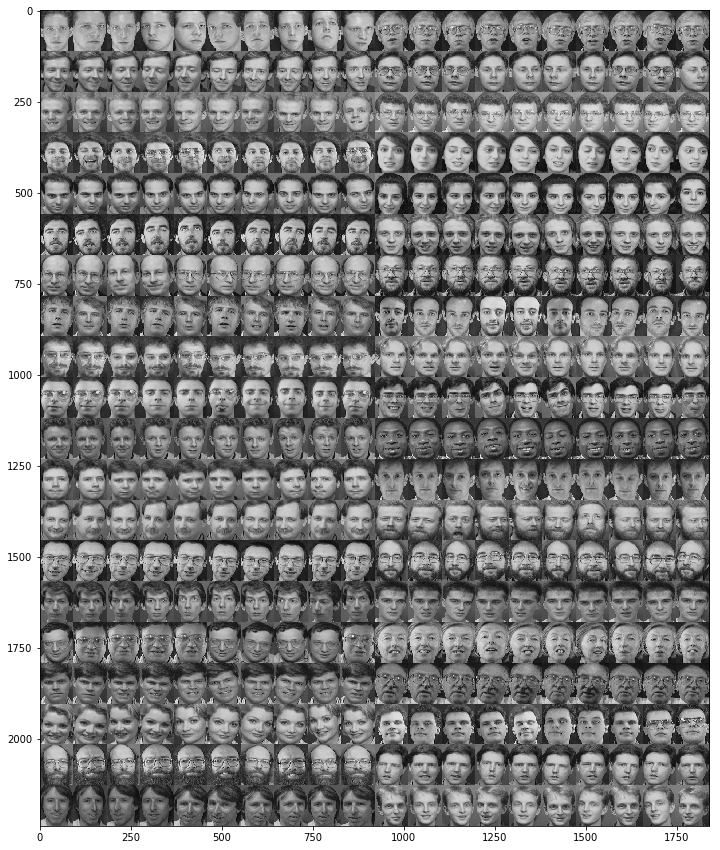

In [4]:
# visualization
Nb_pic = 400
Nb_pic_by_column = 20 
visualize(V,Nb_pic_by_column,Nb_pic)

In [5]:
# Define EM algo to obtain NMF factorization for the matrix V under some assumptions on prior distribution detailed in the report

def EM_algo(prior_W,prior_H,V,K,eps,maxsteps):
    # prior_W : parameters of prior distribution of W (Gamma distribution)
    # prior_H : parameters of prior distribution of H (Gamma distribution)
    # V : matrix we want to factorize
    # K : rank of W (a parameter for the NMF factorization)
    # eps : Error tolleration
    # maxsteps : max iteration for EM algorithm
    
    n_steps = 0
    I_max = np.max(V)
    
    # Initialization of W and H 
    ##Nonnegative init
    W = np.random.uniform(0,I_max,(V.shape[0],K)) 
    H = np.random.uniform(0,I_max,(K,V.shape[1])) 
    
    # Useful variables for the matricial form to update W and H
    
    one_W = np.ones(((V.shape[0],K)))
    one_H = np.ones(((K,V.shape[1])))
    one_DH = np.ones(((V.shape[0],V.shape[1])))
    delta = np.zeros(maxsteps+1)
    
    # Frobinus norm for the error
    delta[n_steps] = np.linalg.norm(V-np.matmul(W,H),ord='fro')
    
    while n_steps < maxsteps:
        
        ## V_hat update ##
        V_hat = np.matmul(W,H)
        
        ## W update ##
        tool = np.matmul(np.divide(V,V_hat),np.transpose(H))
        W = np.multiply(W,tool) + (prior_W[0]-1)*one_W
        W = np.divide(W,np.matmul(one_DH,np.transpose(H))+prior_W[1]*one_W)

        ## V_hat update 1 ##
        V_hat = np.matmul(W,H)
        
        ## H update ##
        tool = np.matmul(np.transpose(W),np.divide(V,V_hat))
        H = np.multiply(H,tool) + (prior_H[0]-1)*one_H
        H = np.divide(H,(np.matmul(np.transpose(W),one_DH))+prior_H[1]*one_H)
        
        n_steps += 1
        delta[n_steps] = np.linalg.norm(V-np.matmul(W,H),ord='fro')
        
        # Convergance test
        if (delta[n_steps-1]-delta[n_steps]<eps):
            break;
            
    to_return = (W,H,n_steps,delta)
    print("NMF done")
    return to_return

** NMF Factorization ** 

After implementing the EM-algorithm for NMF we can apply it o the matrix V and visualize W*H

In [6]:
# Test 1 : 

## %%%%%%%%% Parameters %%%%%%%%% ##
import time
start_time = time.time()

#Parameters \alpha and \beta
prior_W = (1,5)
prior_H = (1,5)

parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,1,200)

print("--- %s seconds ---" % (time.time() - start_time))


NMF done
--- 27.4194629192 seconds ---


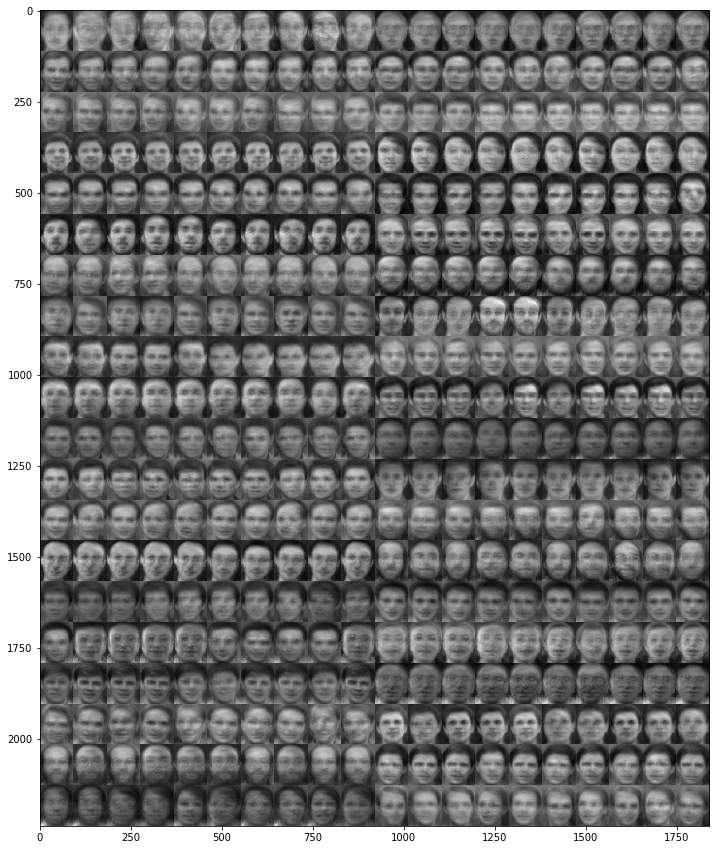

In [7]:
W = simu[0]
H = simu[1]

V_hat = np.matmul(W,H)
visualize(V_hat, 20, 400)

Here above we have plotted the visualization of the matrix $\hat{V} = W\times H$ yielded by our code. As one can see, it is indeed similar to the original representation above, although with a lost of detail which is due to the approximation of $V$ by a product of matrices. Therefore this means that our code is probably correct. However another way of verifying our code is to plot the matrices $W$ and $H$ to see if we get similar figures to the ones in Ali Taylan Cemgil's paper.

## Representation of W and H and their interpretation

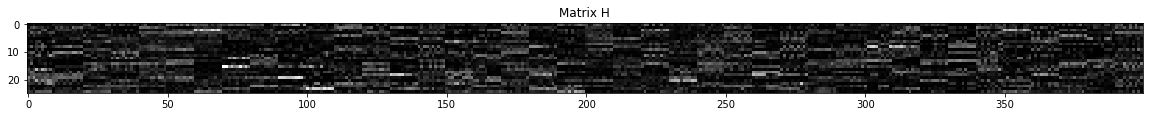

In [8]:
# Visualize of matrix H
plt.figure(figsize=(20,15))
plt.imshow(H)
plt.axis('scaled')
plt.title("Matrix H")
plt.gray()
plt.show()

Visualize W


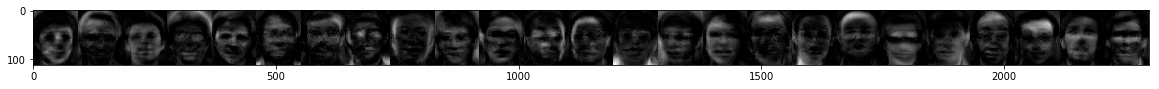

In [9]:
# Visualize matrix W 
print("Visualize W")
#visualize(W, 5,parameter)
visualize(W, 1,parameter)


This is indeed similar to what is presented in the fig. 5 of the above-mentionned paper. 
When performing NMF, aside from the priors on the estimated matrices one must choose the hyperparameter $K$ corresponding to the number of columns (resp. lines) of $W$ (resp. $H$). Since NMF naturally has clustering properties, the columns of $W$ can be interpreted as a choice of the number of "centers" of our "clusters". In the case of the faces dataset the centers correspond to mean facial features, which is exactly what we see.
The coefficients of $H$ give the belonging to a cluster: when $H_{kn} >0$ then the sample $n$ belongs to the cluster $k$. 

To check our algorithm, we run tests with different hyperparameters and we visualize W. Details on the impact of hyperparameters will be studied later.

NMF done
Visualize W


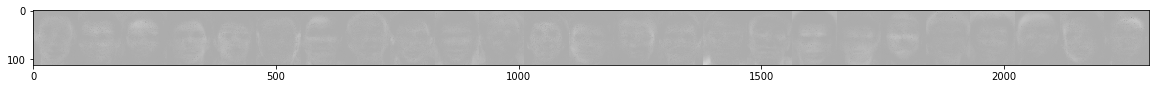

In [10]:
## Tests

## %%%%%%%%% Parameters %%%%%%%%% ##

prior_W = (0.5,10)
prior_H = (1,10)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

#V_hat = np.matmul(W,H)
#visualize(V_hat, 20, 400)

print("Visualize W")

visualize(W, 1,parameter)


NMF done
Visualize W


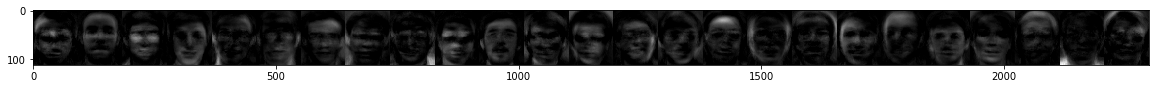

In [11]:
## Tests

## %%%%%%%%% Parameters %%%%%%%%% ##

prior_W = (1,10)
prior_H = (0.5,10)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

#V_hat = np.matmul(W,H)
#visualize(V_hat, 20, 400) ##

print("Visualize W")

visualize(W, 1,parameter)

## Convergence

The EM-algorithm converge. To show that we plot the evolution of $||V-WH||$ at each iteration.

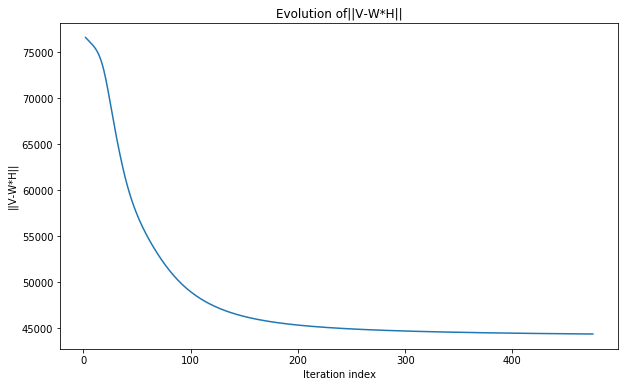

In [12]:
%matplotlib inline
delta = simu[3][2:simu[2]]
x = np.arange(2,simu[2])
plt.figure(figsize=(10,6))
plt.title("Evolution of"r'||V-W*H||')
plt.plot(x,delta)
plt.xlabel("Iteration index")
plt.ylabel(r'||V-W*H||')

# Analysis of the influence of the prior parameters

Although not thorouly correct, the ML NMF updates are obtained by setting $\alpha = 1$ and $\beta = 0$ in both formulae. By comparing $\hat{V}$ obtained for both approaches, one can see that the one obtained without prior seems 'more accurate' and could question the use of a prior.

In fact, the gamma prior is used for two reasons:

- Firstly it is the conjugate prior of the Poisson distribution, and therefore is the easiest and most natural prior to use.
- Furthermore as one will see hereafter, it will act as a regularization and enforce sparsity on the matrices $W$ and $H$, a property which can be desirable.

## Initial analysis

In this section we analyze the impact that the parameters $\alpha$ and $\beta$ for both $W$ and $H$ have. In order to do that we introduce a sparsity measure presented in Cemgil's paper as following for a matrix $X \in \mathbb{R}^{m\times n}$:

\begin{equation}
\text{Sparsity}(X) = \dfrac{\sqrt{mn} - \dfrac{\sum_{i,j} |X_{ij}|}{\sqrt{\sum_{i,j} X_{ij}^2}}}{\sqrt{mn}-1}
\end{equation}

This criterion is 1 when there is a single non-zero coefficient and 0 if all the coefficients are non-zero (it is not defined when the matrix is completely sparse).

**Remark**: We will always have $\alpha_w = \alpha_h$ and $\beta_w = \beta_h$. Tests show that breaking the symetry yields similar results, and hence this situation will not be studied here.

In [13]:
def sparsity_column(M):
    I,J = M.shape
    sparse = np.zeros(J)
    
    for j in range(J):
        sparse[j] = (np.sqrt(I)-np.sum(np.abs(M[:,j]))/np.sqrt(np.sum(M[:,j]**2)))/(np.sqrt(I)-1)
        
    return sparse

##Sparseness measure of the paper ##
def sparseness(M):
    n,m = M.shape
    
    sparse = (np.sqrt(m*n) - np.sum(np.abs(M))/np.sqrt(np.sum(M**2))) \
     /(np.sqrt(m*n)-1)
        
    return sparse

### With $\alpha_w = \alpha_h = 1$:

We set the two $\alpha$ parameters from the priors to $1$ and will analyze the influence of the $\beta$ ones.

NMF done
For beta_w = beta_h = 1


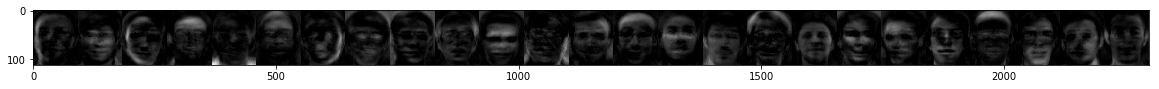

In [14]:
prior_W = (1,1)
prior_H = (1,1)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

print('For beta_w = beta_h = 1')
visualize(W, 1,parameter)



NMF done
For beta_w = beta_h = 20


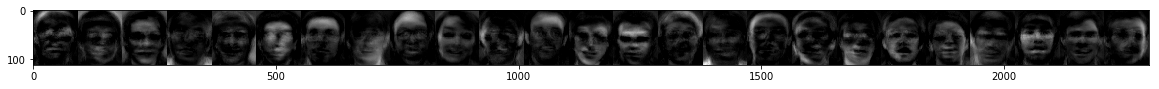

In [15]:
prior_W = (1,0.01)
prior_H = (1,0.01)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

print('For beta_w = beta_h = 20')
visualize(W, 1,parameter)

NMF done
For beta_w = beta_h = 200


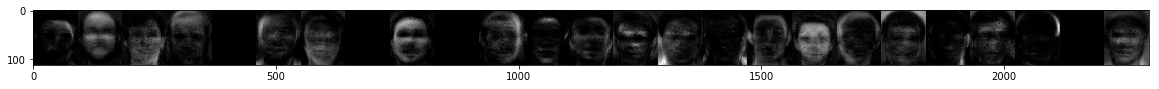

In [43]:
prior_W = (1,200)
prior_H = (1,200)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

print('For beta_w = beta_h = 200')
visualize(W, 1,parameter)

Although with the naked eye the representation of the columns of $W$ for $\beta = 0.01$ and $\beta = 1$ do not seem different, the one for $\beta = 200$ has both very visible facial elements as well as completely black plots. The latter means that the associated columns of $W$ are $0$. Therefore it seems that the parameter $\beta$ influences the size of the coefficients of the matrices and promotes sparsity: large $\beta$'s will result in large sparsity. The sparsity of $W$ using the measure introduced above in function of $\beta$ has been plotted below.

Concerning the influence on the matrix $H$, $\beta$ consequently also plays on the sparsity in a similar fashion.

### With $\beta_w = \beta_h = 1$:

NMF done
For alpha_w = alpha_h = 0.01


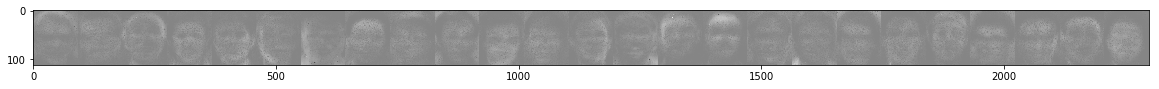

In [17]:
prior_W = (0.01,1)
prior_H = (0.01,1)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

print('For alpha_w = alpha_h = 0.01')
visualize(W, 1,parameter)

NMF done
For alpha_w = alpha_h = 200


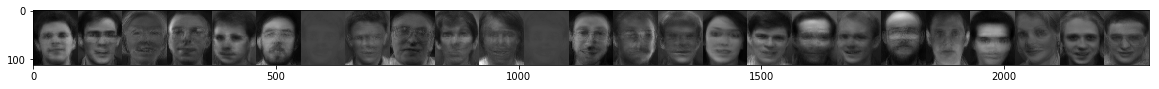

In [18]:
prior_W = (200,1)
prior_H = (200,1)
parameter = 25 # Represent number of columns of W, in other words, the numbers of pictures in W

simu = EM_algo(prior_W,prior_H,V,parameter,0.1,500)

W = simu[0]
H = simu[1]

print('For alpha_w = alpha_h = 200')
visualize(W, 1,parameter)

For very low $\alpha$'s, we see that the pictures become almost uniform and 'whitish'. This comes from the fact that the coefficients of the matrix $W$ become uniformly close to $0$. On the contrary, for high $\alpha$'s all the coefficients of $W$ inflate but they are more variable. The black squares in the plot here above therefore correspond to columns whose coefficients are low relatively to the others.

Therefore we see that $\alpha$ also influences the sparsity of the matrices (the result also holds for $H$): however as one can see with the plot hereafter it seems less potent to enforce sparsity than $\beta$.

In [19]:
betas = np.asarray([0.1,1,10,50,200,500,1000,5000])

def eval_sparsity(alpha,beta,mode):
    if mode=="beta": ##Only a fixed alpha, ie evaluate sparsity wrt beta
        sparse_perc = np.zeros(len(beta))
        
        for i in range(len(beta)):
            simu = EM_algo([alpha,beta[i]],[alpha,beta[i]],V,parameter,1,100)
            sparse_perc[i] = sparseness(simu[0])
            
    elif mode=="alpha":
        sparse_perc = np.zeros(len(alpha))
        
        for i in range(len(alpha)):
            simu = EM_algo([alpha[i],beta],[alpha[i],beta],V,parameter,1,100)
            sparse_perc[i] = sparseness(simu[0])
            
    return sparse_perc

sparse_perc_beta = eval_sparsity(1,betas,"beta")

alphas = np.asarray([1,10,50,200,500,1000,5000])
sparse_perc_alpha = eval_sparsity(alphas,1,"alpha")

###############################

trace0 = go.Scatter(
    x = betas,
    y = 100*sparse_perc_alpha,
    mode = 'lines',
    name = 'beta_w = beta_h = 1'
)

trace1 = go.Scatter(
    x = betas,
    y = 100*sparse_perc_beta,
    mode = 'lines',
    name = 'alpha_w = alpha_h = 1'
)


layout = go.Layout(title='% of sparsity of W in function of the prior parameters',
    xaxis=dict(
        title='Parameter value',
        type='log'
    ),
    yaxis=dict(
        title='% of sparsity'
    ))

data = [trace0,trace1]

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done


## Further analysis

The previous analysis was always studying the effects the prior parameters had separately and that they both influence the sparsity of the matrices. However in fact, they have a joint effect. More exactly, the ratio $\alpha / \beta$ is what conditions the sparsity. Low $ \alpha / \beta$ will yield sparse representations whereas large ones will result in full matrices. This can be seen from the following qualitative reasoning. If $X \sim \mathcal{G}(\alpha,\beta)$ then $\mathbb{E}[X] = \dfrac{\alpha}{\beta}$ and $\text{Var}(X) = \dfrac{\alpha}{\beta^2}$.  Therefore if $\beta$ dominates $\alpha$, both the expected value and the variance will be low and thus most coefficients of the matrices will be $0$. However if $\alpha$ and $\beta$ are of the same order of magnitude, it will lead to a full representation.

This is seen on the plot here below (it is only for $W$, but the result is similar for $H$). One can clearly see that as long as $\beta < \alpha$, the sparsity *plateaus*. Furthermore one also clearly sees that the smaller $\alpha$ is, the larger the sparsity which is in adequation with our previous qualitative reasoning. When $\beta > \alpha$ the sparsity starts to increase, and the smaller the ratio gets, the more the matrix $W$ is sparse.

One interesting fact is that the case $\alpha = 0.1$ shows a weird behavior. Indeed, one would expect the sparsity to be higher than the case $\alpha = 1$ or $\alpha = 10$, which is not the case. The explanation for the observed phenomenon is unknown.

In [ ]:
betas = np.asarray([0.1,1,10,200,1000,5000,10000])
alphas = np.asarray([0.1,1,10,200,1000])

def eval_sparsity2(alpha,beta):
    sparse_perc = np.zeros((len(alpha),len(beta)))
    
    for i in range(len(alpha)):
        for j in range(len(beta)):
            simu = EM_algo([alpha[i],beta[j]],[alpha[i],beta[j]],V,parameter,1,100)
            sparse_perc[i,j] = sparseness(simu[0])
            
    return sparse_perc

sparse_perc2 = eval_sparsity2(alphas,betas)

NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done
NMF done


In [36]:
trace0 = go.Scatter(
    x = betas,
    y = 100*sparse_perc2[0,:],
    mode = 'lines',
    name = 'Alpha = 0.1'
)

trace1 = go.Scatter(
    x = betas,
    y = 100*sparse_perc2[1,:],
    mode = 'lines',
    name = 'Alpha = 1'
)

trace2 = go.Scatter(
    x = betas,
    y = 100*sparse_perc2[2,:],
    mode = 'lines',
    name = 'Alpha = 10'
)

trace3 = go.Scatter(
    x = betas,
    y = 100*sparse_perc2[3,:],
    mode = 'lines',
    name = 'Alpha = 200'
)

trace4 = go.Scatter(
    x = betas,
    y = 100*sparse_perc2[4,:],
    mode = 'lines',
    name = 'Alpha = 1000'
)


layout = go.Layout(title='% of sparsity of W in function of the prior parameters',
    xaxis=dict(
        title='Beta',
        type='log'
    ),
    yaxis=dict(
        title='% of sparsity'
    ))

data = [trace0,trace1,trace2,trace3,trace4]

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

# Analysis of the choice of K

Up to now, we had always $K$ set to $25$. Now we will put it to either $5$ or $400$ and see how it influences the results.

Here below, we represent the (five) columns of $W$ for $K=5$. As one can see, here the resulting columns present almost all elements from a face, contrarly to the situation where $K=25$ where they corresponded only to a single facial feature. Furthermore, they seem blurry. However this is understandable: indeed, with a low $K$, all the needed information to reconstruct all the faces of $V$ must be contained in those $5$ columns: since the faces may be quite different, this results in a blending of the features, therefore yielding the pictures we observe.

NMF done
Visualization of W


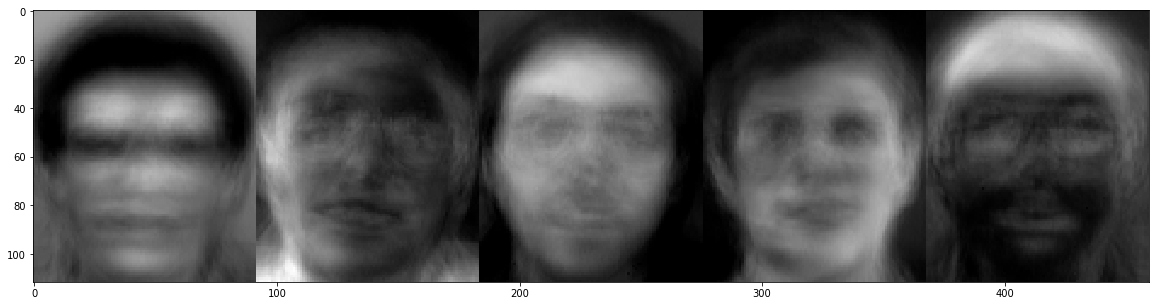

In [37]:
# Visualize matrix W for K = 5
prior_W = (1,5)
prior_H = (1,5)

simu5 = EM_algo(prior_W,prior_H,V,5,1,200)

W5 = simu5[0]
H5 = simu5[1]

print("Visualization of W")
visualize(W5, 1,5)

NMF done
Visualization of W


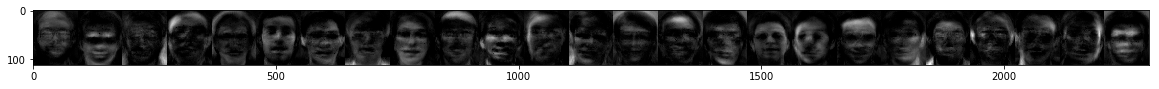

In [38]:
# Visualize matrix W for K = 25

simu25 = EM_algo(prior_W,prior_H,V,parameter,1,200)

W25 = simu25[0]
H25 = simu25[1]

print("Visualization of W")
visualize(W25, 1,25)

NMF done
Visualization of W


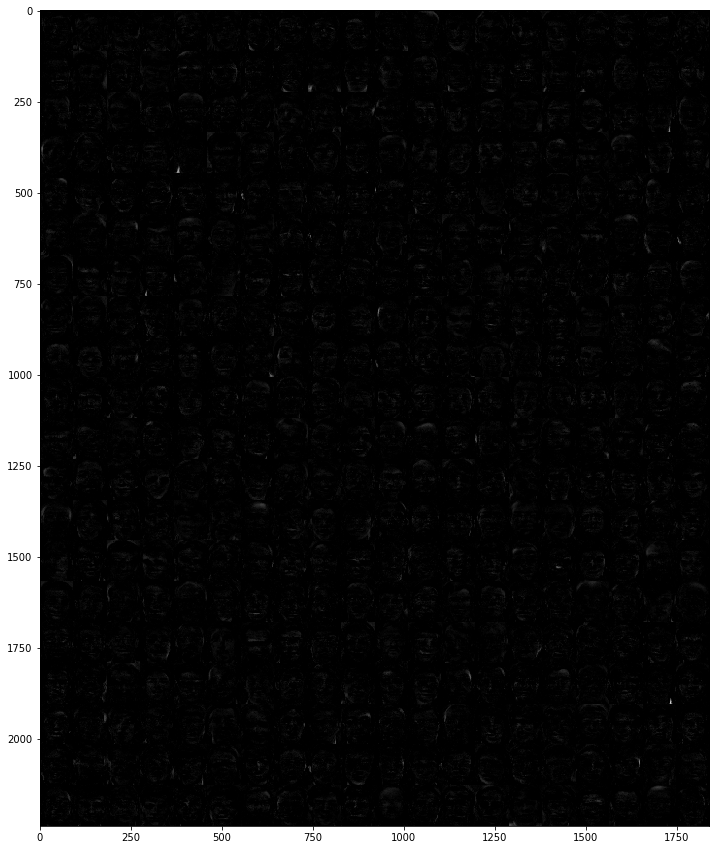

In [39]:
# Visualize matrix W for K = 400

simu400 = EM_algo(prior_W,prior_H,V,400,1,200)

W400 = simu400[0]
H400 = simu400[1]

print("Visualization of W")
visualize(W400, 20,400)

Above, we represented the whole matrix $W$ whereas hereafter only the first $8$ columns are drawn for $K=400$. As one can see, although they still seem to correspond to facial features they are less recognizable and see less general. However this phenomenon is understandable too. Indeed, for a very large $K$ (*i.e.* a very high number of clusters) the algorithm will find features that may be specific to a very small number of faces: the columns of $W$ may thus be very tailored to the input matrix $V$. This sounds similar to overfitting, and in fact when plotting $\hat{V}$ obtained for $K=400$ we indeed obtain an almost perfect reconstruction of the original $V$.

This has also for consequence for the matrix $H$ that the higher $K$ is, the sparser it will be. Indeed if only a handful of columns of $W$ are relevant for a given column of $V$, then only a few coefficients of $H$ will be non-zero. This results is in adequacy in the histograms plotted hereafter which represent the number of columns of $H$ for $K=400$ which have a given percentage of sparsity (the measure of sparsity is similar to the one introduced previously, although for vectors and not matrices).

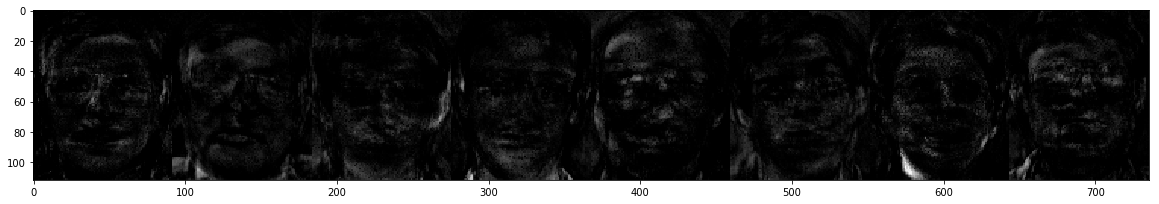

In [40]:
visualize(W400, 1,8) # Show the first 8 columns of W_400

In [29]:

trace1 = go.Histogram(
    x=100*sparsity_column(H25),
    opacity=0.75,
    name='K=25'
)
trace2 = go.Histogram(
    x=100*sparsity_column(H5),
    opacity=0.75,
    name='K=5'
)

trace3 = go.Histogram(
    x=100*sparsity_column(H400),
    opacity=0.75,
    name='K=400'
)

data = [trace1, trace2,trace3]
layout = go.Layout(barmode='overlay',
                  title='Distribution of the percentage of sparsity in the columns of H',
    xaxis=dict(
        title='Percentage of sparsity per column'
    ),
    yaxis=dict(
        title='Number of columns'
    ))
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)


As one can see with the figure above, when $K$ increases the percentage of sparsity in the matrix $H$ increases: when $K$ is large, in $W$ there is a face for almost each one of the training set. Since $H$ denotes the belonging to a cluster, the number of non-zero coefficients per column of $H$ goes to 1 and thus the sparsity to 100%. 

# Conclusion

In this homework we implemented a MAP version of the NMF algorithm with Gamma priors on both of the matrices $W$ and $H$. NMF naturally has clustering properties and as such the columns of the matrix $W$ correspond to facial elements such as the eyes, nose, etc... which are in common among the pictures of the training set. The Gamma prior, through the control of the ratio $\alpha / \beta$ acts as a regularization and enables to have sparsity among the matrices, which was not possible with the regular maximum-likelihood. 

As the simulations here have shown, the choice of the number of columns (or 'clusters') $K$ is of crucial importance. Indeed it must be enough to allow sufficient variability among the faces, but it must not be too high or will lead to find parts which are not representative of a face in general, which is similar to overfitting.